In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../datasets/fruits.csv")

In [3]:
X = df.iloc[:, :-1].values

In [4]:
print(X)

[[150   7]
 [120   8]
 [180   6]
 [110   9]
 [170   5]
 [160   4]
 [140   6]]


In [5]:
y = df.iloc[:, -1].values

In [6]:
print(y)

['Apple' 'Banana' 'Apple' 'Banana' 'Apple' 'Orange' 'Orange']


In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
print(y)

[0 1 0 1 0 2 2]


In [9]:
# Fruit label map
fruit_names = {0: "Apple 🍎", 1: "Banana 🍌", 2: "Orange 🍊"}
colors = ['red', 'yellow', 'orange']

In [14]:
# new fruit
new_fruit = np.array([[130, 6]])
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X,y)
prediction = knn.predict(new_fruit)[0]
predicted_name = fruit_names[prediction]

In [15]:
print(f"Predicted Fruit:{predicted_name}")

Predicted Fruit:Banana 🍌


In [16]:
distances, indices = knn.kneighbors(new_fruit)

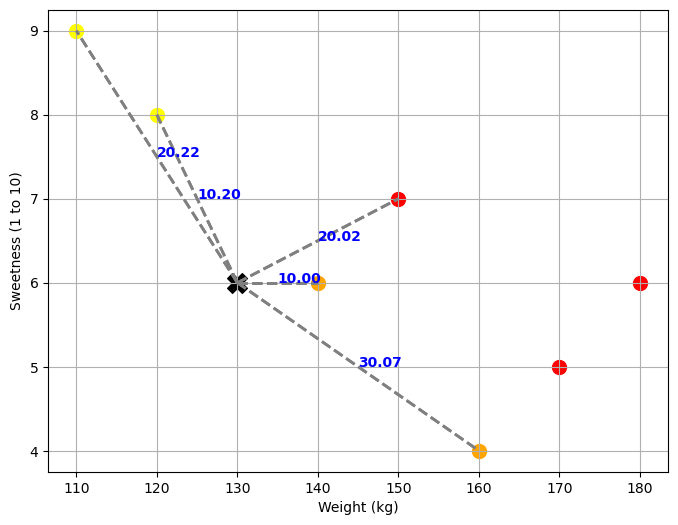

In [17]:
plt.figure(figsize=(8, 6))
# Plot fruits
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], c=colors[label], label=fruit_names[label], s=100)

# Plot the mystery fruit
plt.scatter(new_fruit[0, 0], new_fruit[0, 1], c='black', marker='X', s=200, label="Mystery Fruit ❓")

# DRAW LINES TO NEIGHBORS 🧵
for index in indices[0]:
    neighbor = X[index]
    plt.plot(
        [new_fruit[0, 0], neighbor[0]],
        [new_fruit[0, 1], neighbor[1]],
        c='gray',
        linestyle='--',
        linewidth=2
    )

# DRAW LINES TO NEIGHBORS AND LABEL DISTANCES
for i, index in enumerate(indices[0]):
    neighbor = X[index]
    x_vals = [new_fruit[0, 0], neighbor[0]]
    y_vals = [new_fruit[0, 1], neighbor[1]]
    
    # Draw line
    plt.plot(x_vals, y_vals, color='gray', linestyle='--', linewidth=2)

    # Midpoint for label
    mid_x = (x_vals[0] + x_vals[1]) / 2
    mid_y = (y_vals[0] + y_vals[1]) / 2

    # Distance label
    distance = distances[0][i]
    plt.text(mid_x, mid_y, f"{distance:.2f}", fontsize=10, color='blue', weight='bold')

# Labels and display
plt.xlabel("Weight (kg)")
plt.ylabel("Sweetness (1 to 10)")
plt.grid(True)
plt.show()
